<a href="https://colab.research.google.com/github/Eunjane/J-sMathematical.github.io-/blob/main/R%20program%20lab12_Park.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 12: Clustering (30 points)**

#### **WRITE YOUR NAME HERE**


---
**Instructions**: Complete the lab below.
- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed lab must be submitted to Canvas as a .ipynb file by the end of the lab session**
---

## Necessary packages

In [ ]:
# Install packages (may take 5 minutes)
install.packages("GGally")
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘lme4’, ‘car’, ‘rstatix’, ‘FactoMineR’, ‘ggpubr’




In [ ]:
# load libraries
library(ggplot2)
library(GGally)
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



<br>


---



####<font color=red>Organized</font> (1 points)
* Answers should be organized in the following format for organization and readability

<br>

```
# 1. 
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2. 
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 0</font> (4 points)

In this lab, we will be working with data on arrests in the United States. The dataset `USArrests` is already built into R. More information can be found by running the command `?USArrests`

1. Store the dataset `USArrests` as the dataframe `dat`
2. Plot pairwise plots by running the command `ggpairs(dat)`. This is a command within the GGally library.
3. Interpret the pairs plots. Which variables are correlated? Which variables are not correlated? Explain in complete sentences.

In [ ]:
# run the following code for more information on the dataset
?USArrests

In [ ]:
#0.1
dat <- USArrests
head(USArrests)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


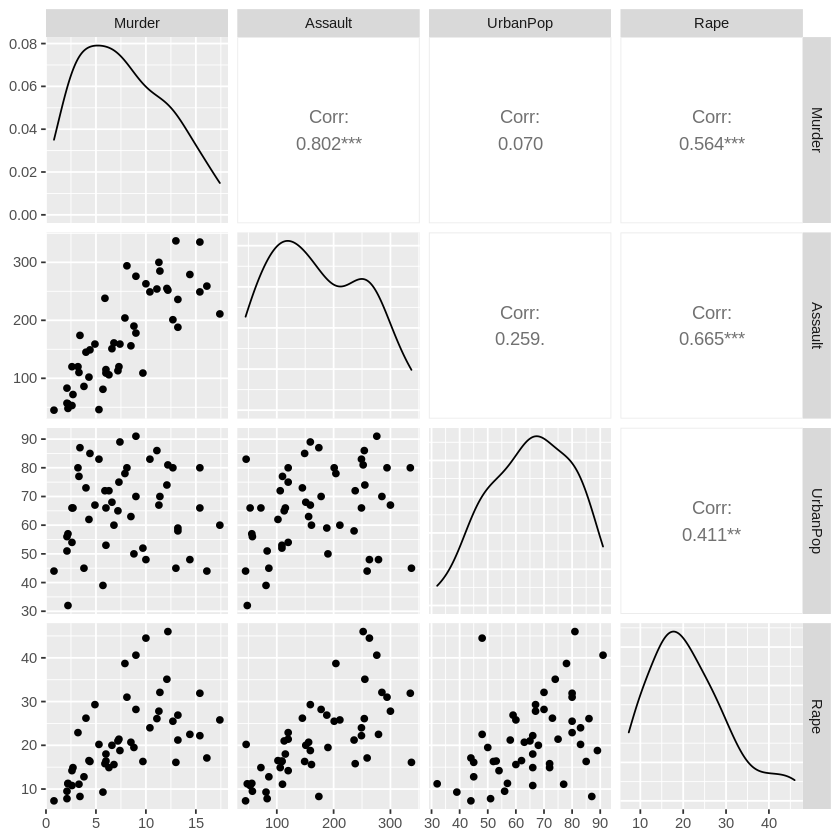

In [ ]:
#0.2
ggpairs(dat)

0.3
Assualt and murder are correlated since the value of correlation is around 0.8***. 

<br>

---

<br>






####<font color=red>Task 1</font>  (8 points)

1. Scale the `dat` dataframe using `scale()` and store as the matrix `mat`

2. Use the `kmeans()` function to cluster the rows of `mat` into K = 2 clusters. Store the clustering as `clustk`. Use the option `nstart = 25`.

3. Print the cluster means for each cluster (`clustk$centers`). What is the interpretation of each cluster? Explain in complete sentences.

4. Run the following command to visualize the clustering.
`fviz_cluster(clustk, data = mat)`. Based on the cluster means from Task 1.3, how would you interpret the clustering? Does this make sense?

Note: the `fviz_cluster()` function plots on axes defined by principal components, which we will not cover in this course. However, you may use this plot to visually identify states within the same clusters.





In [ ]:
#1.1
mat <- scale(dat)
head(mat)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


In [ ]:
print(apply(mat,2,sd))

  Murder  Assault UrbanPop     Rape 
       1        1        1        1 


In [ ]:
#1.2
clustk <- kmeans(mat, centers = 2, nstart=25)


In [ ]:
#1.3
print(clustk$centers)

     Murder    Assault   UrbanPop       Rape
1  1.004934  1.0138274  0.1975853  0.8469650
2 -0.669956 -0.6758849 -0.1317235 -0.5646433


We set k as 2, so for row1 clustered negative values and row2 clustered positive values.

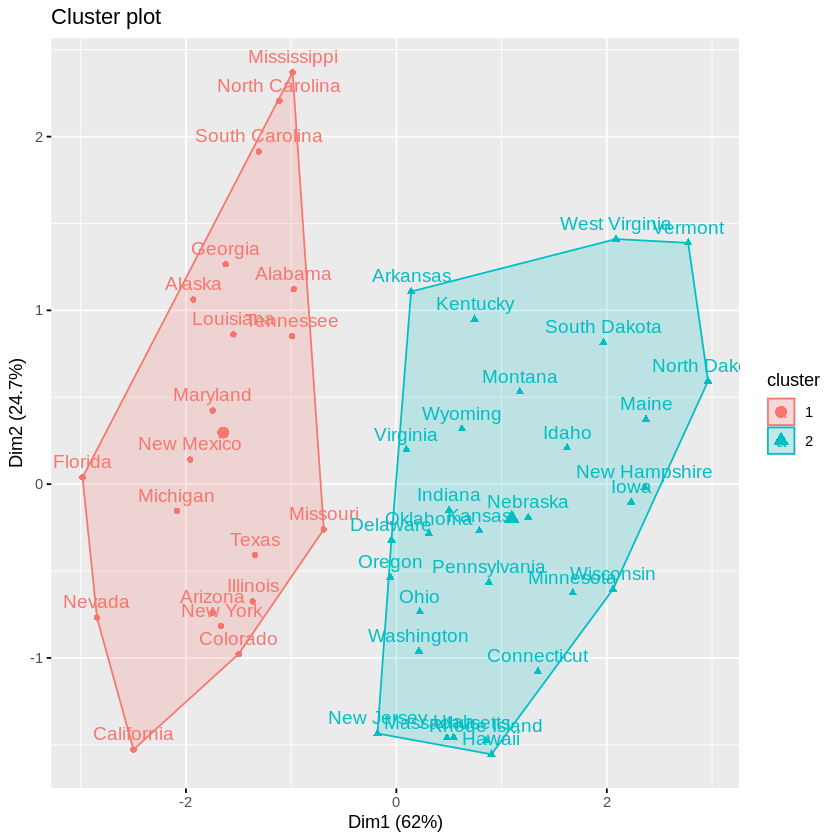

In [ ]:
#1.4
fviz_cluster(clustk, data = mat)

It can be seen that data with close distances through a cluster.

<br>

---

<br>






####<font color=red>Task 2</font>  (8 points)

1. Use the code from lecture to plot an elbow plot to select the optimal number of clusters. Plots clusters from K = 1 to K = 20.

2. Which number of clusters K is the optimal number of clusters, in your opinion. Why?

3. Cluster the data using the number of clusters you selected in Task 2.2.

4. Print the cluster centers/means and plot the clusters using `fviz_cluster()`. Interpret how the states are clustered in complete sentences using cluster means and the plot.






In [ ]:
#2.1
within_var <- c()

for (nb_clust in 1:20) {


  clust <- kmeans(mat, 
                  centers = nb_clust, 
                  nstart = 25)

  within_var <- c(within_var, clust$tot.withinss)
}

print(within_var)

 [1] 196.00000 102.86240  78.32327  56.40317  48.94420  42.83303  38.30416
 [8]  33.77737  29.86789  26.26171  23.66980  21.90717  19.99500  18.51629
[15]  16.86119  15.89756  14.66825  13.34898  12.37837  11.67176


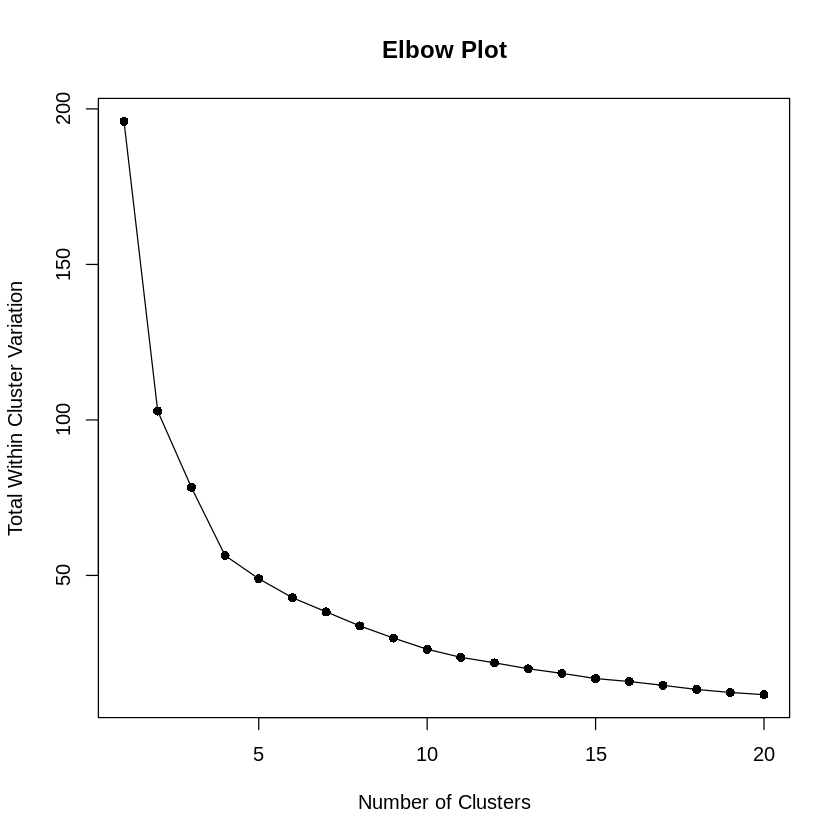

In [ ]:
plot(1:20, within_var, type = "o", pch = 16,
     xlab = "Number of Clusters",
     ylab = "Total Within Cluster Variation",
     main = "Elbow Plot")

2.2 When the number of clusters is 4, the total within-cluster variation is bent in an elbow shape, and the change of tot.withinss is very small when the number of clusters is 5 or more. SO K=4

In [ ]:
#2.3
clustk <- kmeans(mat, centers = 4, nstart = 25) 

      Murder    Assault   UrbanPop        Rape
1 -0.9615407 -1.1066010 -0.9301069 -0.96676331
2  1.4118898  0.8743346 -0.8145211  0.01927104
3 -0.4894375 -0.3826001  0.5758298 -0.26165379
4  0.6950701  1.0394414  0.7226370  1.27693964


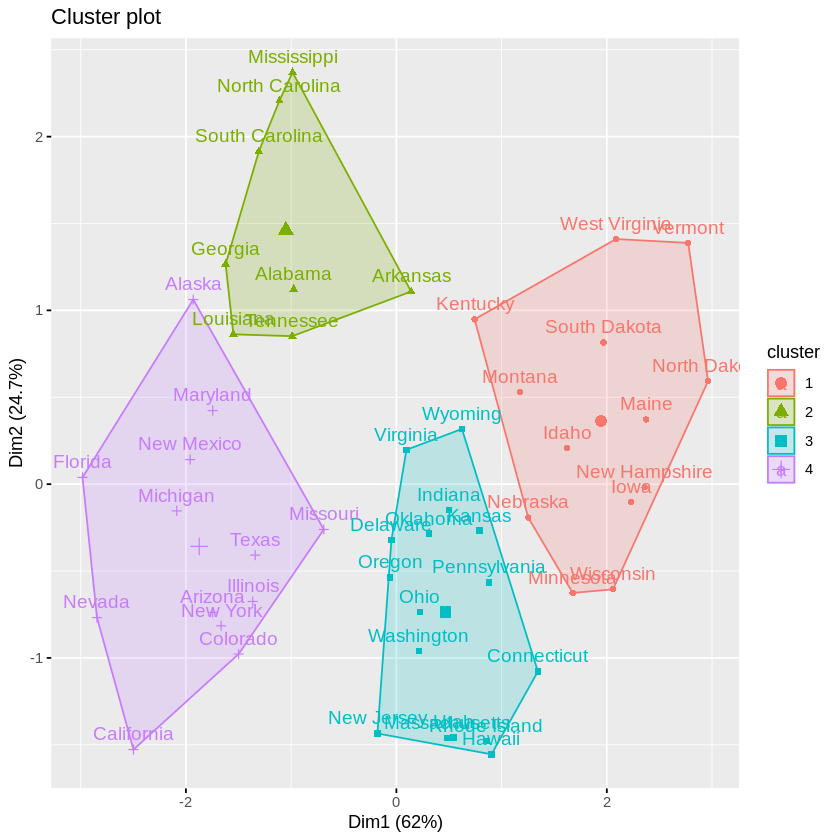

In [ ]:
#2.4
print(clustk$centers)
fviz_cluster(clustk, data = mat)

<br>

---

<br>






####<font color=red>Task 3</font>  (8 points)

1. Using the scaled data `mat`, cluster the states using hierarchical clustering and store as `clusth`. Remember to use `dist()` first.

2. Plot the dendrogram for the hierarchical clustering in `clusth`.

3. Plot the elbow plot for `clusth` using the heights stored in `clusth` (code in lecture). What is the optimal number of clusters, in your opinion? Explain.

4. Use the `rect.hclust()` function to visualize the clustering for the number of clusters you selected. Which states tend to be clustered together?






In [ ]:
#3.1
dist_matrix <- dist(mat)
clusth <- hclust(dist_matrix, 
                method = "complete", 
                )

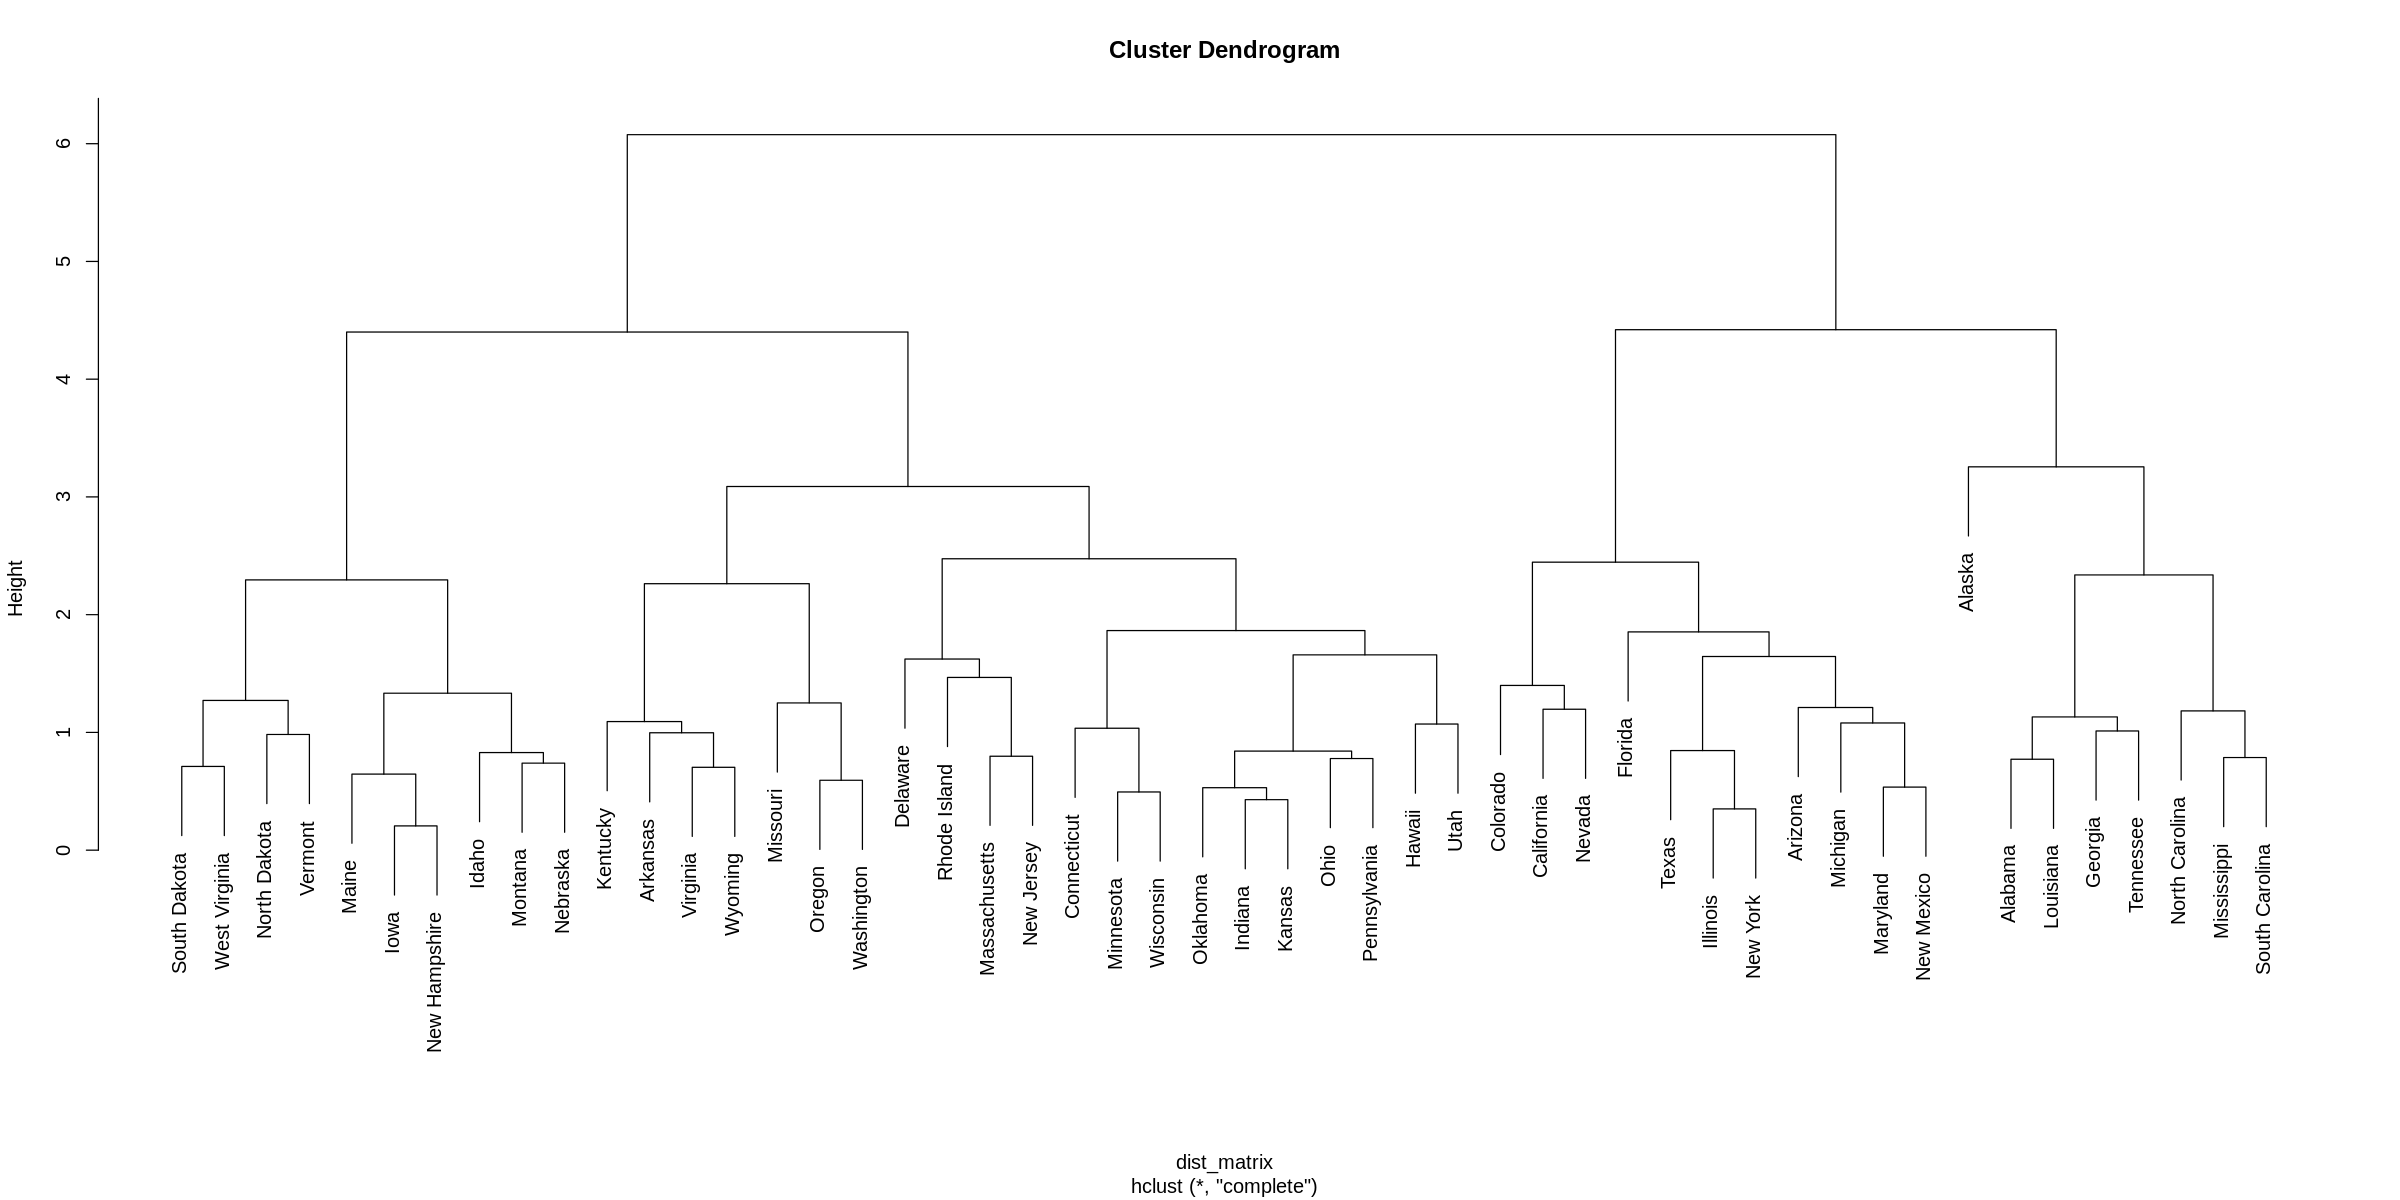

In [ ]:
#3.2
options(repr.plot.width=20, repr.plot.height=10)
plot(clusth)

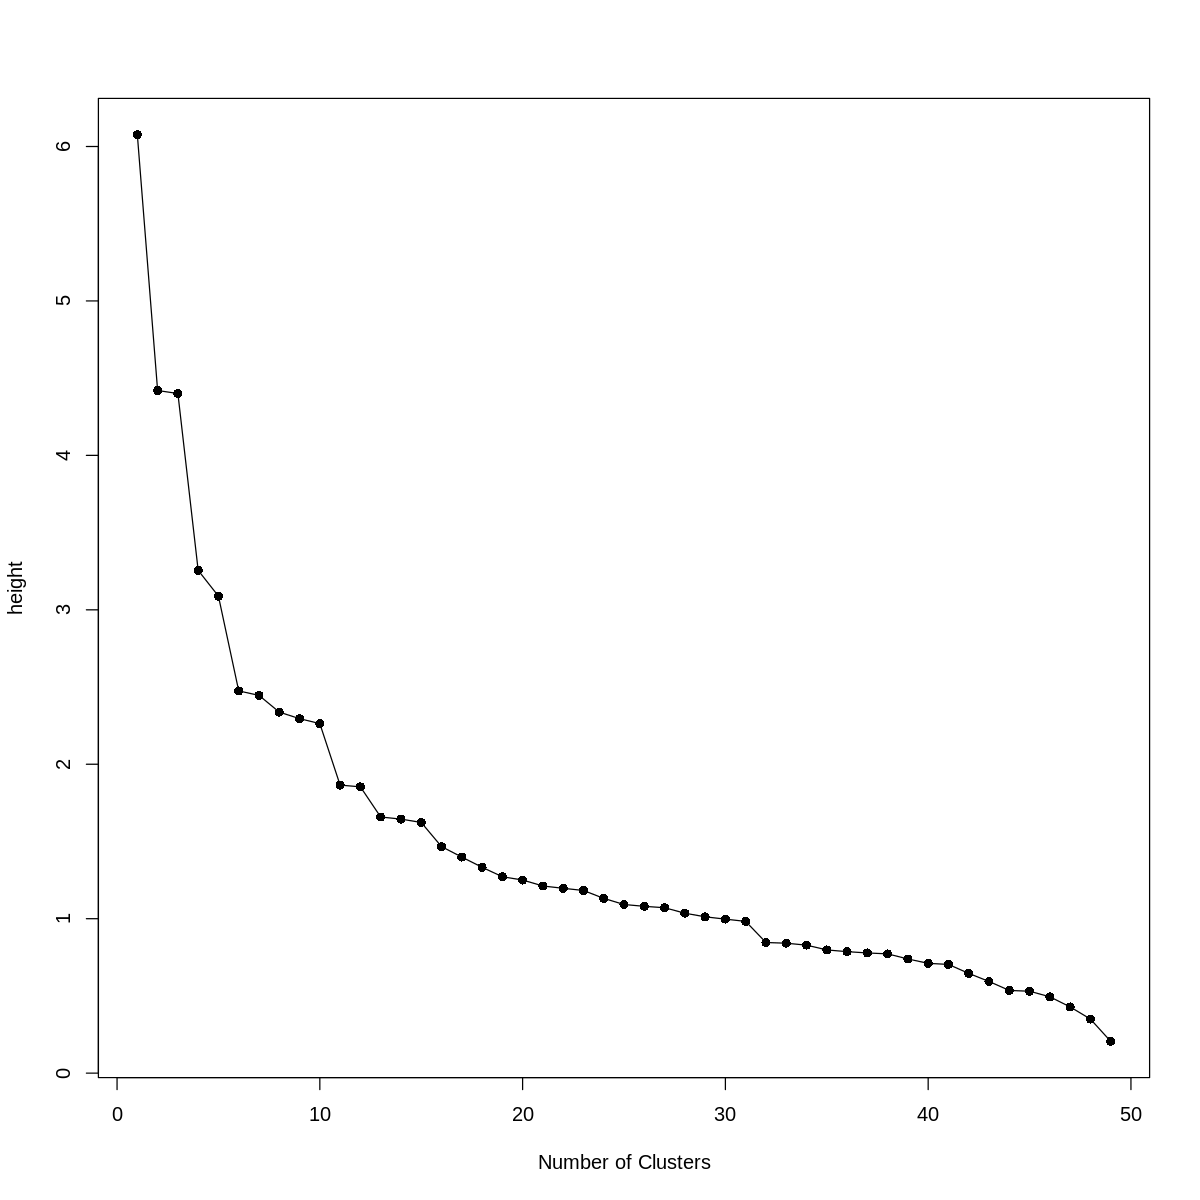

In [ ]:
#3.3
options(repr.plot.width=10, repr.plot.height=10)

plot((nrow(dat) - 1):1, clusth$height, 
     type = "o", pch = 16,
     xlab = "Number of Clusters",
     ylab = "height"
     )

K=6 Because until the number of clusters is 4, the differences for height are big.

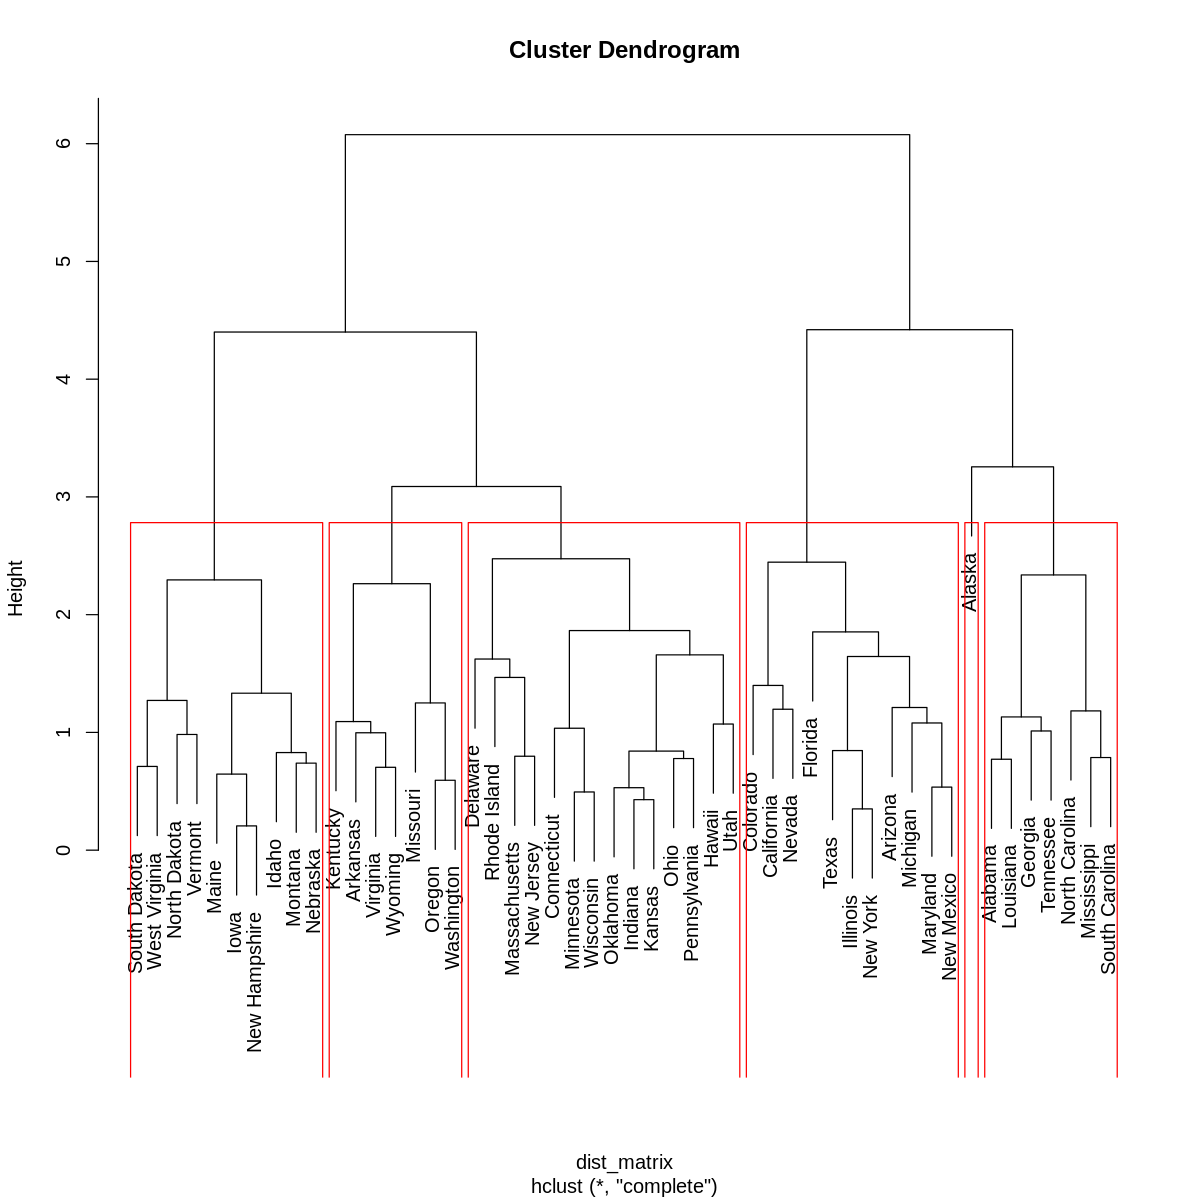

In [ ]:
#3.4
options(repr.plot.width=10, repr.plot.height=10)

plot(clusth)

rect.hclust(clusth,
            k = 6, 
            border = "red")

<br>

---

<br>






####<font color=red>Task 4</font>  (1 points)

The code below also performs hierarchical clustering but with nice visualizations. Feel free to play around with the value K!

```
# Number of clusters
K = 2

# Hierarchical clustering
hc.cut <- hcut(mat, k = K, hc_method = "complete")

# Visualize dendrogram
fviz_dend(hc.cut, show_labels = FALSE, rect = TRUE)

# Visualize cluster
fviz_cluster(hc.cut, ellipse.type = "convex")
```








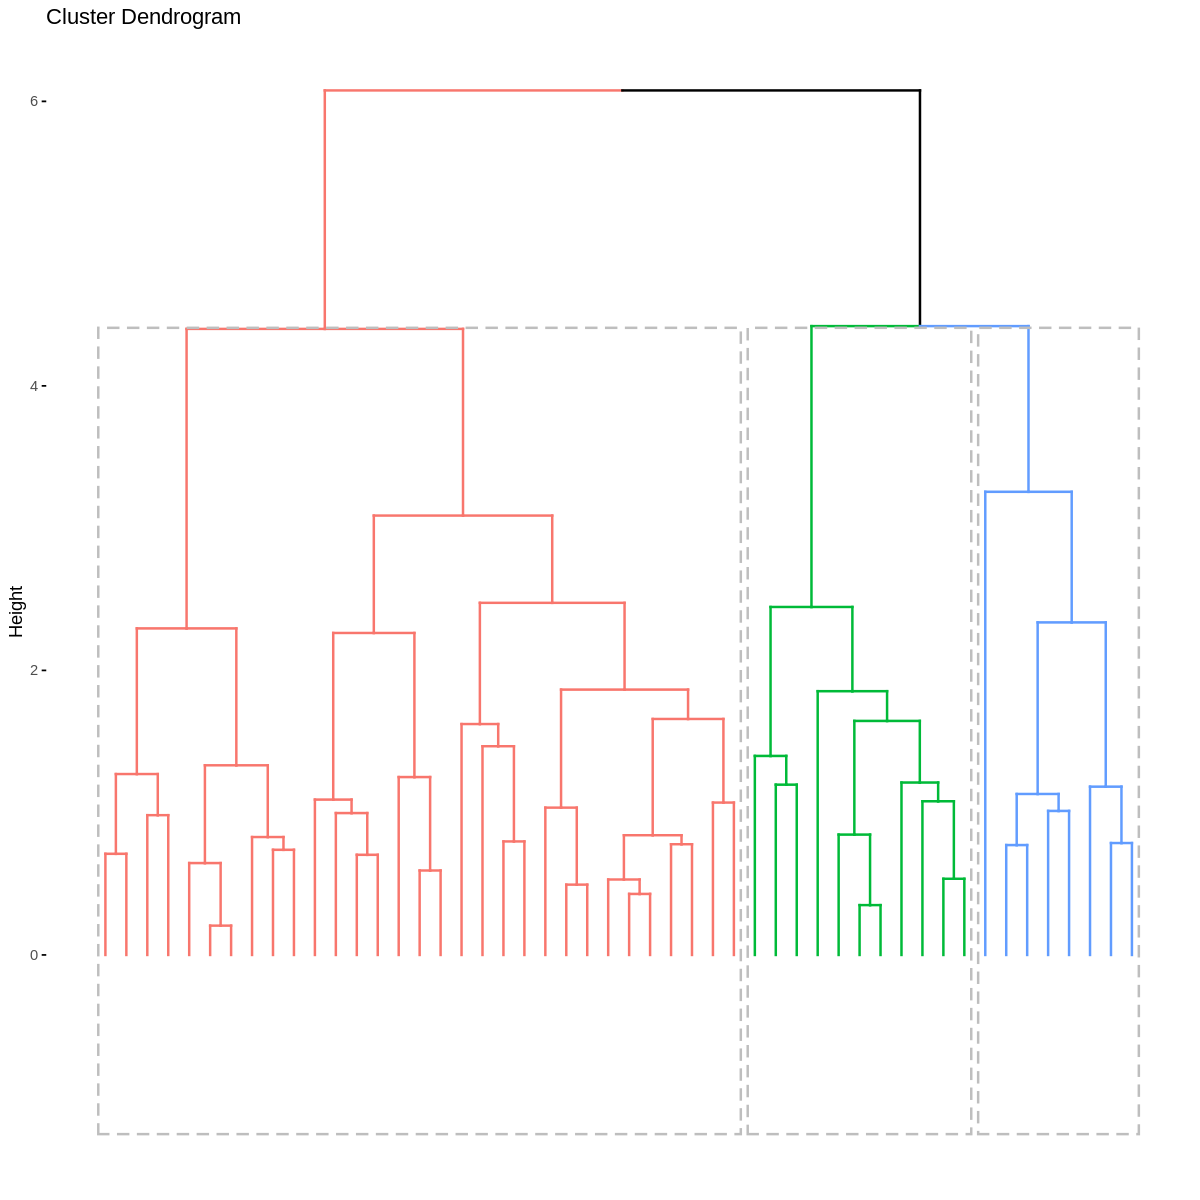

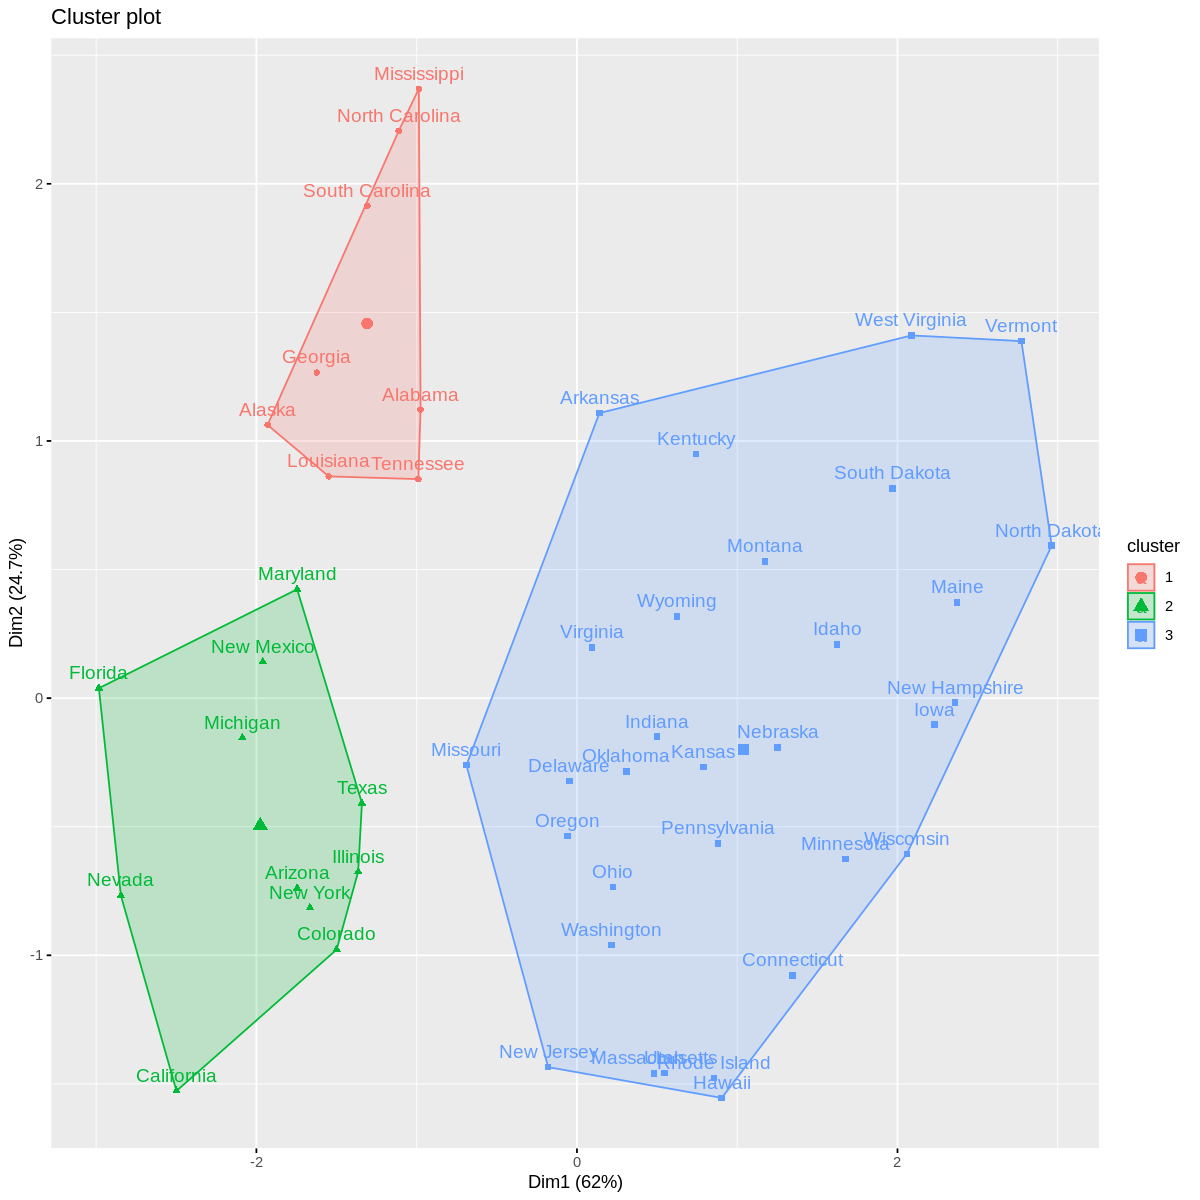

In [ ]:
#4.
hc.cut <- hcut(mat, k = 3, hc_method = "complete")
 
fviz_dend(hc.cut, show_labels = FALSE, rect = TRUE)
 
fviz_cluster(hc.cut, ellipse.type = "convex")